###  Islands: Python Foundations -  Chapter 2

[Back to Main Page](0_main_page.ipynb)

[How to use this book interactively on Deepnote](99_how_to_use_this_book.ipynb)

[Download this book](99_how_to_use_this_book_local.ipynb)

<br>

<h1> <center> Types of Variable, Lists & Indexing </center> </h1> 

## Importing Libraries
The code cell below (the cell with the darker background) imports the libraries we need for this page. This gives us a set of extra functions - these functions are just pre-written bits of code which do useful things.

Once again, <b> it is very important you run each cell in this notebook in the order in which they appear. </b> Later cells depend on the activity of earlier cells. 

<br>
<center> ↓↓↓ <b> Before reading on, please run the code cell below</b>. Click on the cell and press `shift` and `Enter` together. ↓↓↓ </center>
<br>

*Note: the comments in the code cell below (written after the symbol `#`), explain what each line is doing...*

In [1]:
# run this cell (by pressing 'Control' and 'Enter' together) to import the libraries needed for 
# this page

# 'import' tells python to get a set of functions (which is called a library), in the first case this is 
# the numpy library. The 'as' tells python to name the library something (to save us typing out 'numpy'); in this case
# we name the library 'np'
import numpy as np

# in this case we import the pandas library and name it 'pd'
import pandas as pd

# here we import the matplotlib.pyplot library and name it 'plt'
import matplotlib.pyplot as plt

# this imports the machinery for marking answers to questions
from client.api.notebook import Notebook
ok = Notebook('ok_tests/2_lists_indexing.ok')

Assignment: 2_lists_indexing
OK, version v1.18.1



<br>

<center> <img src="https://github.com/pxr687/islands_python_foundations/blob/master/images/mapgen4-187 (2).png?raw=true" width="300"> </center>

<br>

## A psychotic island


Imagine again, as on the [Populations, Samples, Questions](1_populations_samples_questions.ipynb) page, that you are part of a group of scientists who have visited an island which is beset by several public health problems. There are 1000 people living on the island, and it is reported that they all show some signs of cognitive impairment. Further, it is hypothesized that there are more individuals with psychotic disorders on the island than on islands in the surrounding area. The island also has high levels of pollution.

Recall that your research group is here to do several things:

* to help analyse data from two clinical trials which are happening on the island. One trial is of a new drug hypothesized to reduce cognitive impairment. The other trial is of a new drug hypothesized to reduce psychotic symptoms.
* to investigate the hypothesis that the prevalence of psychotic disorders is higher on the island, and if there is increased prevalence, whether pollution may be causally related to this
* to investigate the hypothesis that pollution is causally related to the increased prevalence of cognitive impairment.

We saw the results of the first clinical trial the [previous page](1_populations_samples_questions.ipynb). On the present page, we will investigate a claim made by a psychiatric epidemiologist in your research group. The claim is that, relative to islands in the surrounding area, an unusually high percentage of the citizens of this island suffer from psychotic disorders.  

In statistical terms, the epidemiologist is claiming that the population of this island has a high prevalence of psychotic disorders. 'Prevalence' is defined as:


<i> '[...] the probability of currently having the disease regardless of the duration of time one has had the disease. Prevalence is obtained by dividing the number of people who currently have the disease by the number of people in the study population.' (Rosner, Fundamentals of Biostatistics, 2015, pg. 64) </i>

So, prevalence can be expressed formally as:

$ \Large \text{prevalence} = \frac{\text{number of people who currently have disease}}{\text{total number of people in the population}} $

Python is a powerful tool to test claims of this sort, as it gives you many ways of representing elements of the world, and the relations between them.

Let's think about what the claim is, and how we can evaluate it.

The claim (or hypothesis) is about the *population* of the island. Assuming that it is unfeasible to test the entire population of the island for psychotic disorders (as there are 1000 people!), we are going to have to take a *sample* of the islanders. From this sample we need to make an *inference* about the rest of the population: we are going to have to infer, based on our sample, whether the the prevalence on the island is higher than on other islands in the surrounding area. <b> The prevalence of psychotic disorders on the surrounding islands is 1%. </b>

Python gives us a variety of tools which are useful at every stage of this process. It gives us ways of storing, cleaning and  analysing data. The rest of this book will go through the tools we need to test the psychiatrist's claim...

## Types of variable

A variable is anything we can measure/record that vary between observations. As mentioned earlier, many interesting questions can be boiled down to being about the relationship between variables.

Variables come in different types. That can sound a bit abstract, so I'd like you to think about something I will call the *lab book principle* (I got this idea from [the Handbook of Biological Statistics](http://www.biostathandbook.com/variabletypes.html)). Think of some variables (things we can measure), here are a few I've just thought of, from looking out of my window:

* Number of children each adult living on the street
* Age of each person living on the street
* Religion of each person living on this street
* Life satisfaction of each person living on this street

The *lab book principle* states: to work out what type of variable something is, think about how you would record each observation in a lab book.

So for the number of children each person has we would write a number (0, 1, 2, 3 and so on).

For age...[mention arbitrary level of precision]

For the religion of each person I would write down a label ('Buddhist', 'Sikh', 'Christian', 'Muslim', 'Jewish', 'Atheist' etc.).

For the life satisfaction of each person, we could ask them to rate their life satisfaction on a numerical scale (between 1 and 7 for instance) or we could ask them to select from a set of ordered labels (e.g.: 'very unsatisfied', 'unsatisfied', 'neither satisfied or unsatisfied', 'satisfied', 'very satisfied').

The type of variable we are dealing with influences the analysis methods we can use, and they also lend themselves to being represented in different ways in any programming language we might use. Here are some useful ways of categorizing types of variable:


<b> Quantitative </b>:

For quantitative varibales, each observation in a lab book takes the form of a number. Quantitative variables can be further classified into:

   * *Quantitative discrete* - each observation in the lab book can take only specific numerical values (often integers) within a specific interval. E.g. if we were recording 'number of children of each person on the street', this can take only whole number values from 0 to a very high whole number (whatever the maximum possible number of children that a person could have is...) 
   
   <br>
   
   * *Quantitative continuous* - each observation in the lab book can take any numerical value in a specific interval e.g. if we were recording 'age of every person on this street', then theoretically we could measure time to some arbitrary level of precision (a huge number of decimal places).

<b> Categorical </b>:
   
   * *Ordinal categorical* - each observation in the lab book takes the form of a category label, and the labels can be meaningfully ordered. E.g. the labels 'very unsatisfied', 'unsatisfied', 'neither satisfied or unsatisfied', 'satisfied', 'very satisfied' have an obvious ordering in terms of level of satisfaction (from low to high satisfaction). One way of thinking of what 'meaningfully ordered' means, is that if we had the labels on the axis of a graph, could we re-arrange the order without losing any information? Obviously if we jumbled up the satisfaction labels, we would 
   
   <br>
      
   * *Nominal categorical* - each observation in the lab book takes the form of a category label ('Buddhist', 'Sikh', 'Christian', etc.) but the categories cannot be meaningfully ordered. One way of thinking of this, is that if we had the labels on the axis of a graph, could we re-arrange the order without losing any information?  
   

[EXPLAIN UNIVARIATE PLOTS, DISTINGUISH FROM BIVARIATE PLOTS]


In [13]:
# quantitative variable
age = np.random.normal(36, 12, size = 200 )

age

array([22.96321867, 10.82655145, 42.48175989, 29.85077649, 46.50919767,
       43.96461995, 33.79164843, 43.71663375, 28.11810603, 35.43054469,
       41.74323405, 22.69815146, 60.67744914, 45.23058466, 40.83184808,
       32.39717168, 48.32675671, 42.48644879, 25.67473783, 29.27597109,
       31.72485985, 37.9206533 , 52.30127826, 39.84435803,  7.74906771,
       21.47967451, 29.49673276, 33.28827848, 42.11492112, 38.20649759,
       28.39728872, 46.36126939, 36.4283668 , 54.07959457, 57.59063237,
       38.5206279 , 53.69558252, 24.80500959, 16.75789656,  3.01987672,
       36.24906089, 17.5048917 , 26.85519022, 30.9693856 , 11.67025062,
       38.08991846, 47.79390278, 46.26738377, 31.03463987, 29.34710912,
       37.3601404 , 34.39004696, 20.53786841, 27.68893742, 32.71603222,
       31.8224404 , 17.46225172, 54.70394247, 36.82806853, 41.81765557,
       36.86049505, 31.85561894, 36.28745196, 39.59645831, 29.96694601,
       31.80663052, 56.76251206, 56.96979007, 38.51660991, 32.94

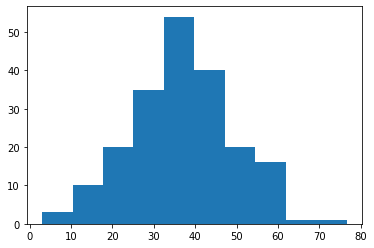

In [14]:
# histogtam for quantitative data
plt.hist(age)

# the code below just shows the plot without any unnecessary output
plt.show()

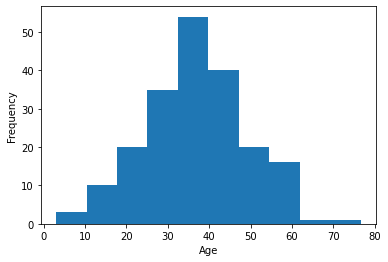

In [16]:
# histogtam for quantitative data
plt.hist(age)

# add axis labels to make it clearer what the histogram shows
plt.xlabel('Age')
plt.ylabel('Frequency')

# the code below just shows the plot without any unnecessary output
plt.show()

In [32]:
# an ordinal categorical variable
satisfaction = np.random.choice(['very unsatisfied', 'unsatisfied', 'neither satisfied or unsatisfied', 'satisfied', 'very satisfied'],
                                p = [0.5/5, 1/5, 1.5/5, 1/5, 1/5], size = 200)


satisfaction

array(['satisfied', 'unsatisfied', 'very unsatisfied', 'very unsatisfied',
       'neither satisfied or unsatisfied', 'very unsatisfied',
       'neither satisfied or unsatisfied', 'satisfied',
       'neither satisfied or unsatisfied', 'satisfied', 'satisfied',
       'satisfied', 'satisfied', 'neither satisfied or unsatisfied',
       'neither satisfied or unsatisfied',
       'neither satisfied or unsatisfied',
       'neither satisfied or unsatisfied', 'unsatisfied',
       'very satisfied', 'neither satisfied or unsatisfied', 'satisfied',
       'satisfied', 'satisfied', 'satisfied', 'very satisfied',
       'neither satisfied or unsatisfied',
       'neither satisfied or unsatisfied',
       'neither satisfied or unsatisfied', 'satisfied', 'very satisfied',
       'unsatisfied', 'satisfied', 'satisfied',
       'neither satisfied or unsatisfied',
       'neither satisfied or unsatisfied',
       'neither satisfied or unsatisfied', 'very satisfied',
       'neither satisfied or un

In [33]:
# get value counts
np.unique(satisfaction, return_counts = True)

(array(['neither satisfied or unsatisfied', 'satisfied', 'unsatisfied',
        'very satisfied', 'very unsatisfied'], dtype='<U32'),
 array([71, 47, 27, 33, 22], dtype=int64))

In [34]:
# two arrays are returned above 
np.unique(satisfaction, return_counts = True)[0]

array(['neither satisfied or unsatisfied', 'satisfied', 'unsatisfied',
       'very satisfied', 'very unsatisfied'], dtype='<U32')

In [35]:
# two arrays are returned above
np.unique(satisfaction, return_counts = True)[1]

array([71, 47, 27, 33, 22], dtype=int64)

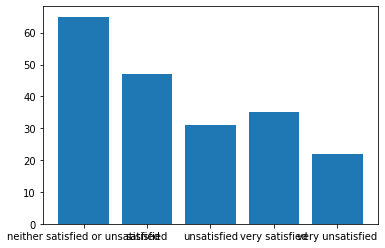

In [31]:
# bar plot for ordinal categorical data
plt.bar(np.unique(satisfaction, return_counts = True)[0], np.unique(satisfaction, return_counts = True)[1])
plt.show()

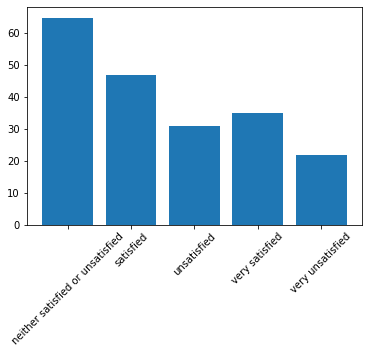

In [30]:
# make x axis labels look better
# an ordinal categorical variable
satisfaction = np.random.choice(['very unsatisfied', 'unsatisfied', 'neither satisfied or unsatisfied', 'satisfied', 'very satisfied'],
                                p = [0.5/5, 1/5, 1.5/5, 1/5, 1/5], size = 200)

plt.bar(np.unique(satisfaction, return_counts = True)[0], np.unique(satisfaction, return_counts = True)[1])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# bar plot showing

[how types of variable are represented in python]

In [2]:
3

3

In [1]:
3
type(3)

int

In [3]:
print(3)
type(3)

3


int

In [4]:
3.0

3.0

In [5]:
print(3.0)
type(3.0)

3.0


float

In [ ]:
[exceptions of ordinal data, categorized variables, distinction between what the variable is vs how you treat it]

[Discuss psychosis prevalence in terms of the discussion about variables]

## Lists

Firstly, we are going to need a way of storing the data we have collected. One way of storing data in python is in a `list`. 

Imagine we go to the island and, during some exploratory data collection, the psychiatrist in the research group observes 5 islanders, in a [convenience sample](https://research-methodology.net/sampling-in-primary-data-collection/convenience-sampling/). The psychiatrist determines whether or not each participant is currently experiencing an episode of psychosis. This assessment is made based on the overt behaviour of the participants, and their score on a psychiatric questionairre. Some other data (on demographic variables, and the name of each participant) is also collected for each of the 5 individuals. 

We could store the results of these observations in a python ```list```. 

In python, a list is a collection of elements stored between square brackets and separated by commas. The list below contains the psychiatrist's diagnosis of the 5 people we observed on the island:

In [2]:
['psychotic', 'not_psychotic', 'not_psychotic', 'not_psychotic', 'psychotic']

['psychotic', 'not_psychotic', 'not_psychotic', 'not_psychotic', 'psychotic']

We can store this list as a ```variable```. We can do this by typing the name we want to give to the variable, followed by an equals sign, followed by the list. 

So, for example, the cell below shows the discipline of each scientist in the research group visiting the island:

In [3]:
['anthropology', 'psychology', 'criminology', 'psychiatry', 'medicine', 'neuroscience']

['anthropology',
 'psychology',
 'criminology',
 'psychiatry',
 'medicine',
 'neuroscience']

Let's say we wanted to store this list as a variable called `list_of_disciplines`. We would do this with the command in the cell below:

In [4]:
list_of_disciplines = ['anthropology', 'psychology', 'criminology', 'psychiatry', 'medicine', 'neuroscience']

Now the list is stored in our computer's memory, and can be retrieved using the name `list_of_disciplines`. We can retrieve the list by typing its name in a cell and running it:

In [5]:
list_of_disciplines

['anthropology',
 'psychology',
 'criminology',
 'psychiatry',
 'medicine',
 'neuroscience']

### Question 1

Let's return to the list of the psychosis status of the first five individuals we observed on the island:

In [6]:
['psychotic', 'not_psychotic', 'not_psychotic', 'not_psychotic', 'psychotic']

['psychotic', 'not_psychotic', 'not_psychotic', 'not_psychotic', 'psychotic']

Let's store this list as a variable, so we can access it when we need it. Let's call our list ```psychosis_status_observations```. 

In the cell below, store the list of psychosis statuses as a variable called `psychosis_status_observations`:

In [7]:
psychosis_status_observations = ...

In [8]:
# run this cell to check your answer
_ = ok.grade('q1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question > Suite 1 > Case 1

>>> # psychosis_status_observations is not a list! A list is a collection of items, surrounded by sqaure brackets. E.g.: [1,2,3,4,5] is a list.
>>> type(psychosis_status_observations) == list
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q1 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



Now, to view the contents of the list, we can type the name of the list and run the cell:

In [9]:
psychosis_status_observations

Ellipsis

You might have noticed that each element of the list has ```'``` either side of it. This is because the elements of this list are *strings* - which is just a name for text in python. It is important to place either ```'``` or ```"``` either side of a string so python knows it is a string. If you do not place ```'``` or ```"``` either side of the string, then python will think the elemt is a variable - like our ```psychosis_status_observations``` list - rather than a string:

In [10]:
psychosis_status_observations

Ellipsis

In [11]:
'psychosis_status_observations'

'psychosis_status_observations'

We can store other types of data in a list. In order to arrive at the judgments of ```psychotic``` or ```not_psychotic``` for the observations list, our psychiatrist friend collected questionairre scores for each person we observed. 

The questionairre measures the number/intensity of psychotic symptoms that a person is experiencing. Here is the list containing the psychosis scores for the 5 people we observed:

In [12]:
psychosis_scores = [80, 20, 14, 13, 91] # this line stores the scores, as a list, in a variable called 'psychosis_scores'
psychosis_scores  # this line shows us the contests of the list

[80, 20, 14, 13, 91]

The type of data in the ```psychosis_scores``` list is ```int``` - meaning *integer* (whole number, no decimal places). So, each element in the list is of the ```int``` type. 

It is important to keep in mind which type of data you are dealing with, as certain operations in python only work with specific types of data. We will see this in more detail later on.

`strings`, `ints` and `floats` (numbers with decimal places) are some of the foundational data types used in python. `floats` and `ints` are generally most useful for representing quantitative variables (variables where each observation is a number). `strings` are generally most useful for representing categorical variables (variables where each observation is a category).

## Indexing a list

Imagine the psychiatrist inititally collected the data by writing each individual's score in a lab book.

The psychiatrist is checking that the data has been entered into python correctly (checking data quality is an extremely important (albeit boring) part of data analysis). 

The psychiatrist asks us to tell them whether or not the third person they observed was psychotic, to check the answer from data stored in the python list corresponds to the data in their lab book. 

We could check whether the third person observed was psychotic simply by looking at the list, counting up until the third person, and then reading whether or not they were psychotic. Do this now and see if the third person in the ```psychosis_status_observations``` list was psychotic.

In [13]:
psychosis_status_observations

Ellipsis

If we want python to do this for us we can use square brackets, placed immediately after the name of the variable. This is called *indexing*. We type the name of the list, followed by square brackets containing the index number of the element we would like to retrieve.

It is very important to know that in Python (and many other computer languages) we begin counting from 0. 

So, if we want to get the *first* element from the ```psychosis_status_observations``` list we would type:

In [14]:
 psychosis_status_observations[0]

TypeError: 'ellipsis' object is not subscriptable

If we wanted to view the second element we would type:

In [ ]:
 psychosis_status_observations[1]

Do not worry about the code in the cell below, it is just to generate a table as an illustration, just run the cell and look at the output.

The first row in the table above shows the elements in the ```psychosis_status_observations``` list. The second row, called ```index number``` shows the number you would have to put between ```[]``` to access that element of the list.

In [ ]:
# do not worry about this code, it just generates the table
illustration = pd.DataFrame([psychosis_status_observations,np.arange(len(psychosis_status_observations))], 
                            columns = ['','','','',''])
illustration.index = ['observations:', 'index number:']
illustration

### Question 2

Try and get the third element from the ```psychosis_status_observations``` list, and store it as a variable called `third_element`. 

Also save the index number which you used in a variable called `index_of_third_element`. 

In [ ]:
third_element =  psychosis_status_observations[...

index_of_third_element = ...

# this line just forces the output of the cell to show us what value is stored in the third_element variable
third_element 

In [ ]:
# run this cell to check your answer
_ = ok.grade('q2')

### Question 3
Try and get the 5th element from the ```psychosis_status_observations``` list, and store the answer in a variable called `fifth_element`. 

Also store the index number which you used in a variable called `index_of_third_element`. 

In [ ]:
fifth_element =  ...
                                            
index_of_fifth_element = ...

# this line just forces the output of the cell to show us what value is stored in the fifth_element variable
fifth_element 

In [ ]:
# run this cell to check your answer
_ = ok.grade('q3')

### Question 4

This list below records the biological sex of the individuals we and the psychiatrist observed on the island.

In [ ]:
observations_sex = ['male', 'male', 'female', 'female', 'female']

Use what you have learned about indexing to retrieve the sex of the 4th person we sampled (REMEMBER: python begins counting from 0, not from 1). Store your answer in a variable called `fourth_person`, and store the index number that you used in a variable called `index_of_fourth_person`:

In [ ]:
fourth_person =  ...
                                            
index_of_fourth_person = ...


# this line just forces the output of the cell to show us what value is stored in the fourth_person variable
fourth_person 

In [ ]:
# run this cell to check your answer
_ = ok.grade('q4')

## Slicing

Imagine that the psychiatrist wants to check that the data on the biological sex of the first three people we observed has been correctly recorded in python. In order to retrieve this data, we could get one element at a time, by using 
```observations_sex[0]```, ```observations_sex[1]``` and ```observations_sex[2]```. But there is a faster way: we can use a *slice*.

To get a slice from a list, we use a ```:```. To get a slice of the last few elements of a list, put a colon in the square brackets, followed by the index number of the first element that do <b> NOT </b> want in the slice. 

So, if our list was called `list` and we wanted to get everything *up to but not including* the 4th element we would use:

`list[:3]`

Remember, because we count the index locations from 0, this means that the index location of the 4th element is `[3]`.

So to view a slice of the first three elements of the `observations_sex` list, we type:

```{python}
observations_sex[:3]
```

Run the two cells below...

You can see that the ```[:3]``` is 'slicing' off the last two elements of the list:

In [ ]:
observations_sex

In [ ]:
observations_sex[:3]

If you want to 'slice off' earlier elements in a list, you place the colon <b> AFTER </b> the index number of the first element that you <b> DO </b> want in the slice:

In [ ]:
observations_sex[3:]

Run the two cell below...

You can see that the ```[3:]``` is 'slicing' off the first three elements of the list:

In [ ]:
observations_sex

In [ ]:
observations_sex[3:]

We can get a slice from the middle of a list in exactly the same way, by starting with the index of the first element we want in the list and ending on the first element we <b> do not </b> want in the list.

Run the two cells below. The slice in the second cell is produce by using the index `[1:3]`. This tells python to start at the element with index 1 and then stop (and do not include) the element at index location 3:

In [ ]:
observations_sex

In [ ]:
observations_sex[1:3]

Slicing (and counting the indexes from 0) can take a bit of getting used to. Run the first cell below (so that the output displays the full `observations_sex` list). Then, in the second cell, experiment with using different slices, and see which elements of the full list are being returned. Experiment with this until you feel comfortable with how slicing works.

In [ ]:
# just run this cell
observations_sex

In [ ]:
# experiment with different slices in this cell, until you feel you understand how slicing works

observations_sex[...]

### Question 5

The list below shows the names of the five people whose psychosis scores and status the psychiatrist recorded:

In [ ]:
names = ['roy', 'david','lucy', 'aiesha', 'amelia']
names

Our psychiatrist friend, wants to check the names of the last three people we observed, against the data in their lab book. Create a slice containing the last three names from the ```names``` list, and store this in a variable called `last_three`:

In [ ]:
last_three = ...

# this line just forces the output of the cell to show us what value is stored in the last_three variable
last_three

In [ ]:
# run this cell to check your answer
_ = ok.grade('q5')

### Question 6

The psychiatrist wants to check the names of the second and third person we observed. Create a slice containing the second and third person from the ```names``` list and store this slice in a variable called `second_and_third`:

In [ ]:
second_and_third = ...


# this line just forces the output of the cell to show us what value is stored in the second_and_third variable
second_and_third

In [ ]:
# run this cell to check your answer
_ = ok.grade('q6')

### Question 7
The psychiatrist wants to know the names of the third and fourth person we observed. Create a slice containing the second and third person from the ```names``` list:

In [ ]:
third_and_fourth = ...


# this line just forces the output of the cell to show us what value is stored in the third_and_fourth variable
third_and_fourth

In [ ]:
# run this cell to check your answer
_ = ok.grade('q7')

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests/2_lists_indexing") if q.startswith('q')]

## Summary

We now have a few of the main tools we will need to represent the data relevant to testing the psychiatrist's claim about the prevalence of psychotic disorders.

However, the tools we have looked at on this page are useful for storing the data. We will want to analyse the data once we have stored it. In order to do that we will need to know how to retrieve data which meets certain conditions (such as retrieving all the scores in a dataset which are above a certain value). 

For that, we will need *boolean indexing*, which allows us to select data which meets a certain condition, or set of conditions. We will look at boolean indexing [next page.]('3_arrays_booleans.ipynb)

Or, you can [return to the main page](0_main_page.ipynb).

To navigate to any other page, the table of contents is below:

## Other Chapters

1. [Populations, Samples & Questions: Why Learn Python?](1_populations_samples_questions.ipynb)
2. [Types of Variable, Lists & Indexing](2_variables_lists_indexing)
3. [Arrays & Boolean Indexing](3_arrays_booleans.ipynb)
4. [Functions, Plotting & Another Clinical Trial](4_functions_plotting.ipynb)
5. [For Loops - doing things over (and over and over...)](5_for_loops.ipynb)
6. [Testing via Simulation: Psychosis Prevalence](6_simulation_psychosis_prevalence.ipynb)
7. [Pandas DataFrames](7_pandas_dataframes.ipynb)
8. [Testing via Simulation II: Pollutant Exposure](8_simulation_pollution_impairment.ipynb)

***
By [pxr687](99_about_the_author.ipynb) 